# Support Vector Machines

- SVM is a powerful and versatile machine learning model, capable of performing linear or nonlinear classification, regression and even **Outlier** detection

## Linear SVM classification

- SVM is a vector that seperates both classes but for that purpose (if features are linearly seperable) there are infinite amount of lines

- Therefore you can think of an SVM classifier as fitting widest possible street between the classes.

- It is fully determined (or "supported") by the instances located on the edge of the street. These instances are called the support vectors.

- Vector is the "instance" (from feature) that "supports" that's why it is called support vector machine.

- SVMs are sensitive to the feature scales.

## Soft Margin classification.

- If we strictly impose that all instances must be off the street and on the right side this is called hard margin classification.

- Missclassification is not allowed in this hard-margin classification.

- Hard margin is quite sensitive to outliers and it only works when the data is linearly seperable.

- SVM allows for some misclassification or violation of the margin. The objective becomes finding a balance between keeping this misclassification as low as possibel and maximizing the margin. The soft margin approach tends to generalize better to unseen data, particularly when the data is not perfectly linearly seperable.

- Flexibility of soft margin classification is controlled by a hyperparameter often denoted s "C".

- A smaller value of C creates a wider margin but allows more margin violations, a larger value of C creates a narrower margin but allows fewer violations.

- SVMs are open to overfitting, so you can try  regularizing it by reducing C.

- Unlike logistic regression or decision trees SVM classifiers do not output probabilities for each class.

## Nonlinear SVM classification.

- One approach handling nonlinear datasets is to add more features such as polynomial features (like in linear regression).

- You can get the same result by setting SVC kernel to poly and setting degree

- The hyperparameter coef0 controls how much the model is influenced by high degree polynomials versus low degree polynomials

- A common approach to finding the right hyperparameter values is to use grid search. It is often faster to first do a very coarse grid search then a finer grid search around the beset values found. Having a good sense fo what each hyperparameter actually does can also help you to search in the right part of the hyperparameter space.

- Just like the polynomial features method the similarity features can be useful with any machine learning algorithm, but it may be computationally expensive to compute all the additional features. especially on large training sets.

- Gussian RBF KERNEL (similarity function) has gamma and C hyperparameters

- Increasing gamma makes the bell-shaped curve narrower. As a result each instance's range of influence is smaller: the decision boundary ends up being more irregular. Conversely a small gamma value makes the bell shaped cure wider. If your model is overfitting you should reduce it; if it is underfitting you should increase it (similiar to X hyperparameter).

- As a rule of thumb you should always try the linear kernel first. especially if the training set is very large or if it has plenty of features. If the training set is not too large you shouild also try the Gaussoan RBF kernel; it works well in most cases. Then if you have spare time and computing power, you can experimentwith ferw other kernels using cross validation and grid search you;d want to experiment like that especially if there are kernels specialized for your training set's data structure.

## Computational Complexity.

- The LinearSVC class is based on the liblinear library, which implements an optimized algorithm for linear SVMs. It does not support the kernel trick.

- The SVC class is based on the libsvm library which implements an algorithm that supports the kernel trick.

- Computational complexity is usually between O(m3 * n) and O(m2 * n) it gets dreadfully slow when the number of training instances gets large. 


## SVM Regression.

- SVM also supports linear and nonlinear regression.

- To use SVMs for regression instead of classification, yhe trick is to reverse the objective instead of trying to fit the largest possible street between two classes while limiting the margin violations. SVMRegression trues to fit as many instances as possible on the street while limiting the margin violations.

- SVMs can also be used for outlier detection; see Scikit-Learn's documentation for more details.


In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [4]:
iris = datasets.load_iris()

X = iris.data[:, (2, 3)]
y = (iris["target"] == 2).astype("float64")

In [9]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", LinearSVC(C=1, loss="hinge"))
])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', LinearSVC(C=1, loss='hinge'))])

In [99]:
svm_clf.score(X, y)

0.5

In [126]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ("PolyFea", PolynomialFeatures(4, include_bias=False)),
    ("sclr", StandardScaler()),
    ("svm_clf", LinearSVC(C=100))
])

polynomial_svm_clf.fit(X, y)


c:\Users\ayber\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('PolyFea', PolynomialFeatures(degree=4, include_bias=False)),
                ('sclr', StandardScaler()), ('svm_clf', LinearSVC(C=100))])

In [127]:
polynomial_svm_clf.score(X, y)

1.0

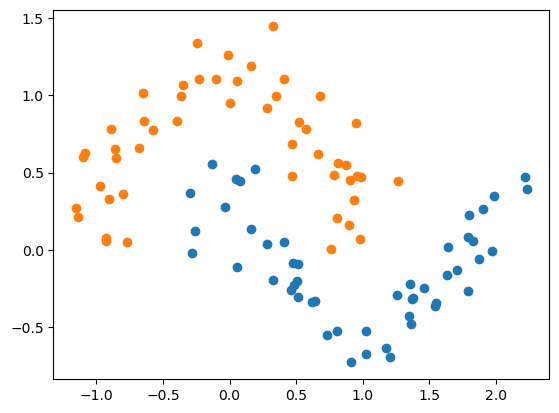

In [128]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1])
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0])

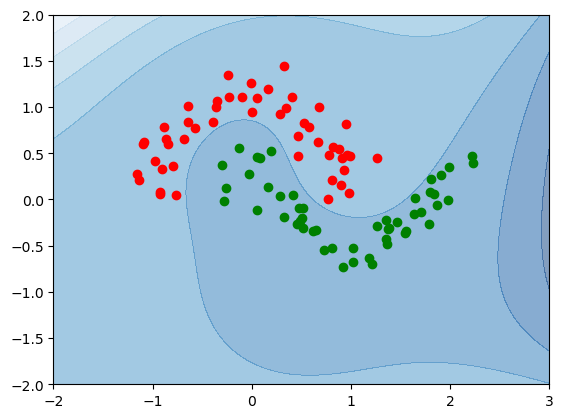

In [131]:
x0s = np.linspace(-2, 3, 1000)
x1s = np.linspace(-2, 2, 1000)
x0, x1 = np.meshgrid(x0s, x1s)

X_pre = np.c_[x0.ravel(), x1.ravel()]

y_pre = polynomial_svm_clf.predict(X_pre).reshape(x0.shape)
y_decision = polynomial_svm_clf.decision_function(X_pre).reshape(x0.shape)
plt.contourf(x0, x1, y_decision, cmap="Blues", alpha=0.5)

plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], color="g")
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], color="r")